## Build Models With Antimony
[Antimony](http://antimony.sourceforge.net/) is a model definition language that has been used together with [RoadRunner](https://sys-bio.github.io/roadrunner/python_docs/index.html) in a python package called [Tellurium](http://tellurium.analogmachine.org/) for constructing SBML models. Tellurium enables conversion between sbml and antimony and these functions (together with command line copasi) have been used by PyCoTools to enable building COPASI models with Antimony. For more information on how to build an antimony model, please see [here](http://tellurium.readthedocs.io/en/latest/antimony.html) or [here](http://tellurium.analogmachine.org/documentation/antimony-tutorial/).

In [8]:
from pycotools import model, tasks, viz
import os, glob
% matplotlib inline

### A Negative Feedback Motif

In [9]:
working_directory = r'/home/b3053674/Documents/Models/2018/03_March/AntimonyDemo'
copasi_filename = os.path.join(working_directory, 'NegativeFeedbackModel.cps')

with model.BuildAntimony(copasi_filename) as loader:
    negative_feedback = loader.load(
        """
        model negative_feedback()
            compartment cell = 1.0
            var A in cell
            var B in cell

            vAProd = 0.1
            kADeg = 0.2
            kBProd = 0.3
            kBDeg = 0.4
            A = 0
            B = 0

            AProd: => A; cell*vAProd
            ADeg: A =>; cell*kADeg*A*B
            BProd: => B; cell*kBProd*A
            BDeg: B => ; cell*kBDeg*B
        end
        """
    )
negative_feedback

#### Simulate from Negative Feedback Model

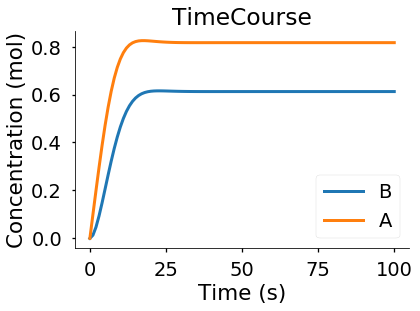

In [11]:
TC = tasks.TimeCourse(negative_feedback, end=100, intervals=100, step_size=1)
viz.PlotTimeCourse(TC, separate=False)

### Positive Plus Negative Feedbck Loop

In [48]:
copasi_filename = os.path.join(working_directory, 'MichaelisMenten.cps')

with model.BuildAntimony(copasi_filename) as loader:
    positive_plus_negative = loader.load(
        """
        model PositivePlusNegativeFB()
            compartment cell = 1.0
            var A in cell
            var B in cell
            var C in cell
            
            E = 0;
            S = 0;
            P = 0;
            
            R1: => A; cell*kBasalAProd + cell*kAProd*C;
            R2: A => ; cell*kADeg*A*B;
            R3: => B; cell*kBProd*A;
            R4: B => ; cell*kBDeg*B;
            R5: => C; cell*kCProd*B; 
            R6: C => ; cell*kCDeg*C;
            
            kBasalAProd = 0.1
            kAProd = 0.1
            kADeg = 0.01
            kBProd = 1
            kBDeg = 0.1
            kCProd = 0.1
            kCDeg = 0.06
        end
        """
    )
positive_plus_negative 

Model(name=PositivePlusNegativeFB, time_unit=s, volume_unit=l, quantity_unit=mol)

#### Simulate

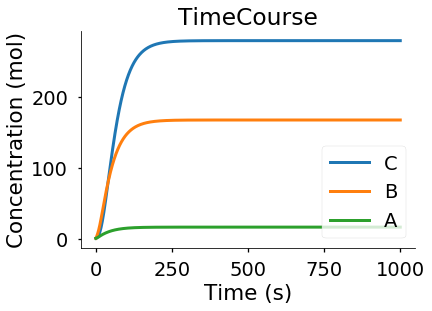

In [47]:
TC = tasks.TimeCourse(positive_plus_negative, end=1000, intervals=1000, step_size=1)
viz.PlotTimeCourse(TC, separate=False)